# Genetic alogorithm
https://en.wikipedia.org/wiki/Genetic_algorithm

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import Image

https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

- A stochastic method for function optimization based on the mechanics of natural genetics and biological evolution.
- In nature, organisms' genes tend to evolve over successive generations to better adapt to the environment. 
- The genetic algorithm is a heuristic optimization method inspired by the procedures of natural evolution.
- Genetic algorithms operate on a population of individuals to produce better and better approximations.
- At each generation, a new population is created by selecting individuals according to their level of fitness in the problem domain and recombining them together using operators borrowed from natural genetics. The offspring might also undergo mutation.

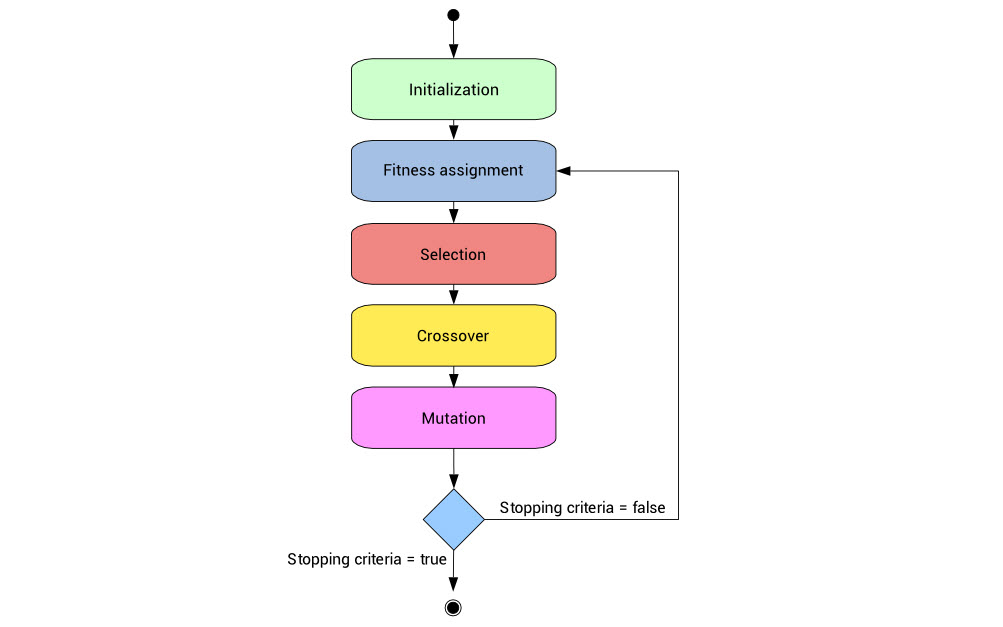

In [2]:
Image(filename='../image/fe/gn.jpg', width=1000, height=600)

### 생존함수(objective function) 정의
- 모든 세대의 목적함수(objective) : Binary string-based optimization problem : OneMax
           * Evaluates a binary string based on the number of 1s in the string. 
           * For example, a bitstring with a length of 20 bits will have a score of 20 for a string of all 1s.
- n_pop개의 개체 수의 개별 객체의 유전자 형태는 n_bits(boolean type genes, chrosome)
- genes 개수(n_bits)
- 유전할 세대(n_iter)
- 세대의 인구(n_pop)
- 교차교배와 돌연변이(r_cross, r_mut)

# 1. Initial population of random bitstring
- 100명의 부모 집단(n_pop)의 개별 객체의 boolean type genes(chrosome)은 n_bits

In [5]:
n_pop = 100
n_bits = 20
print(f'총 고유한 유전자 조합 개수(DNA)는 {2**n_bits}개')

pop = [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
pop[:10]
len(pop)

총 고유한 유전자 조합 개수(DNA)는 1048576개


[[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]]

100

(array([ 4.,  4., 11., 10., 17., 21., 15., 11.,  4.,  3.]),
 array([ 4. ,  5.1,  6.2,  7.3,  8.4,  9.5, 10.6, 11.7, 12.8, 13.9, 15. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'The first generations superiority')

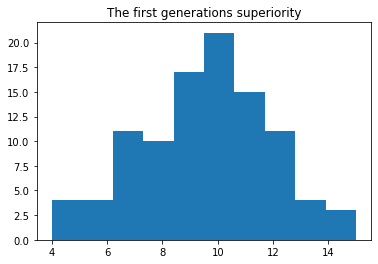

In [3]:
plt.hist(np.sum(pop, 1))
plt.title('The first generations superiority')

# 2. evolution conditions
- 세대교체 수(n_iter), 교차교배율, 돌연변이율 정의
- for gen in range(n_iter):

In [4]:
# define the total iterations (세대교체 회수)
n_iter = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)

# 3. evaluate all candidates in the population
## objective function (생존 함수)
- 개체별 생존력을 확인
- '1' genes가 많을 수록 생존력이 강하고 우성이다.

In [5]:
def objective(x):
    return -sum(x)

In [6]:
scores = [objective(c) for c in pop]
print(f'총 {n_pop}개 개체의 목적함수;')
''.join(str(scores))

총 100개 개체의 목적함수;


'[-11, -7, -9, -7, -10, -14, -8, -7, -13, -9, -9, -11, -11, -8, -10, -11, -10, -10, -10, -10, -9, -10, -9, -12, -8, -12, -8, -12, -8, -10, -8, -7, -11, -11, -12, -9, -7, -10, -11, -10, -7, -13, -12, -10, -6, -13, -7, -11, -9, -12, -9, -9, -9, -12, -12, -11, -7, -10, -10, -13, -7, -10, -11, -8, -5, -14, -12, -5, -11, -11, -10, -6, -10, -12, -10, -9, -10, -15, -11, -9, -5, -9, -9, -8, -8, -10, -8, -10, -9, -6, -7, -4, -10, -9, -6, -11, -9, -11, -12, -7]'

# 4. The survival of fittest
## 4.1 tournament selection
- 각 세대의 모든 부모들을 토너먼크 방식으로 비교(기준은 목적함수)
- 부모세대에서 k명을 무작위로 골라 목적함수를 서로 비교하여 최종 1명을 고르는 작업을(토나먼트 방식) n_pop(100명)만큼 수행하여 하여 다음 세대를 선택

In [7]:
def selection(pop, scores, k=5):
    # 100명에서 1명을 무작위 선택(first random selection)
    selection_ix = np.random.randint(len(pop)) # 100번 시행
    for ix in np.random.randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]: 
            selection_ix = ix
    return pop[selection_ix]

In [8]:
# select parents
selected = [selection(pop, scores) for _ in range(n_pop)]
print(f' k(=5)개의 개체끼리 토너먼트에 생존방식에 의해 선택된 세대의 총 {n_pop}개의 개체와 genes')
pd.DataFrame(selected)

 k(=5)개의 개체끼리 토너먼트에 생존방식에 의해 선택된 세대의 총 100개의 개체와 genes


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0
1,0,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,1,0
2,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,1,0,1,0
3,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1
4,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,1,0,1,0
96,1,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,1
97,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0
98,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1


## 4.1 crossover two parents to create two children

- 교차교배확률에 따라 p1, p2를 교차교배, 예시는 100% 교차 교배확률(즉 무조건 교차교배)

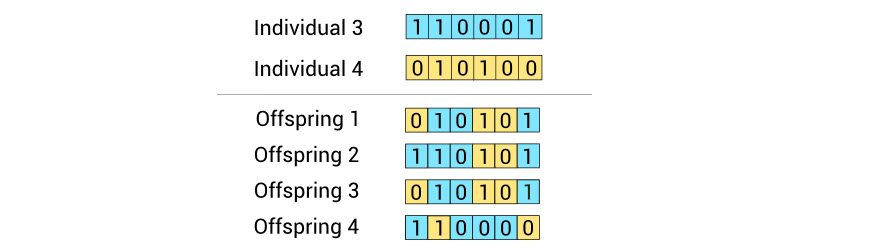

In [8]:
Image(filename='../image/fe/co.jpg', width=1000, height=600)

In [9]:
p1 = [np.random.randint(0, 2) for i in range(20)]
p2 = [np.random.randint(0, 2) for i in range(20)]
c1, c2 = p1.copy(), p2.copy()
pt = np.random.randint(1, len(p1)-10)
# perform crossover
c1 = p1[:pt] + p2[pt:]
c2 = p2[:pt] + p1[pt:]
print(f'p1 개체의 genes는 {p1}')
print(f'c1 개체의 genes는 {c1}')

p1 개체의 genes는 [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
c1 개체의 genes는 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]


- 교차교배 확률(r_cross)에 따라 p1, p2를 교차교배, 예시는 100% 교차 교배확률(즉 무조건 교차교배)

In [10]:
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if np.random.rand() < r_cross:  #교차교배 확률
        # select crossover point that is not on the end of the string
        pt = np.random.randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

## 4.2 mutation operator
- crossover 사용자정의함수를 실행하면 다음 세대 2개의 children이 생성
- 돌연변이 확률에 따라 변이 발생 (특정 개체의 개별 gene에 돌연변이 발생)

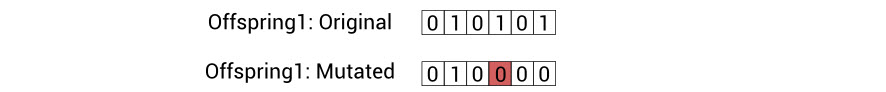

In [7]:
Image(filename='../image/fe/mu.jpg', width=1000, height=600)

In [11]:
for c in crossover(p1, p2, r_cross):
    c

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]

[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]

In [12]:
c = [np.random.randint(0, 2) for i in range(20)]
print(f'부모세대 유전자배열                      {c}')

for i in range(len(c)): # 교차교배
    c[i] = 1 - c[i]
print(f'100% 돌연변이 발생시 자식세대 유전자배열 {c}')

부모세대 유전자배열                      [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
100% 돌연변이 발생시 자식세대 유전자배열 [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]


In [13]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if np.random.rand() < r_mut: # 돌연변이 확률
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

## 4.3 create the next generation

In [14]:
children = list()

for i in range(0, n_pop, 2):
    # get selected parents in pairs
    p1, p2 = selected[i], selected[i+1]
    # crossover and mutation
    for c in crossover(p1, p2, r_cross):
        # mutation
        mutation(c, r_mut)
        # store for next generation
        children.append(c)
print('다음 세대의 population과 genes')        
pd.DataFrame(children)

다음 세대의 population과 genes


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0
1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0
2,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1
3,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,0,1,0,1,1
4,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0
96,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
97,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,1,1,1,0,1
98,0,0,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1


# 5. genetic algorithm
# 5.1 Single evolution

### <font color='purple'> A. Population(1세대 첫번째 개체 gene과 생존함수 값)

In [16]:
pop = [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
pop[0]
objective(pop[0])

[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]

-10

- 1세대의 첫번째 개체의 목적함수 값

In [17]:
best, best_eval = 0, objective(pop[0])
best
best_eval

0

-10

### <font color='purple'> B. Fitness calculation (1 세대 모든 개체의 생존함수 값)

In [18]:
scores = [objective(c) for c in pop]
''.join(str(scores))

'[-10, -12, -12, -10, -12, -11, -10, -9, -12, -13, -12, -11, -9, -9, -16, -6, -10, -8, -12, -10, -9, -10, -9, -10, -9, -10, -8, -11, -14, -9, -7, -8, -12, -9, -10, -12, -5, -5, -9, -7, -10, -12, -8, -10, -11, -10, -12, -12, -10, -10, -8, -8, -6, -9, -9, -11, -10, -8, -7, -10, -12, -9, -10, -12, -8, -12, -9, -10, -10, -9, -10, -12, -15, -10, -11, -12, -9, -8, -12, -7, -9, -9, -12, -9, -12, -9, -10, -15, -6, -4, -11, -10, -12, -11, -9, -7, -9, -8, -6, -10]'

- 1 세대 첫번째 개체와 비교를 시작하여 목적합수 값이 높은 개체를 순서대로 확인(확인만)

In [19]:
for i in range(n_pop):
    if scores[i] < best_eval:
        best, best_eval = pop[i], scores[i]
        print(f'1 세대에 등장한 {i}번 우열 개체의 유전자{pop[i]}와 목적함수 값은{scores[i]}')

1 세대에 등장한 1번 우열 개체의 유전자[1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]와 목적함수 값은-12
1 세대에 등장한 9번 우열 개체의 유전자[1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]와 목적함수 값은-13
1 세대에 등장한 14번 우열 개체의 유전자[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]와 목적함수 값은-16


### <font color='purple'> C. Mating Pool & Parents selection

In [20]:
''.join(str([objective(selection(pop, scores)) for i in range(n_pop)])) # n_pop 회수의 코너먼트를 치룬 100개의 우수 유전자를 가진 개체의 생존 점수
len([selection(pop, scores) for i in range(n_pop)])

'[-12, -12, -12, -12, -12, -11, -11, -12, -12, -10, -12, -11, -12, -15, -15, -12, -12, -12, -14, -11, -10, -12, -12, -16, -12, -12, -15, -12, -12, -12, -10, -12, -10, -11, -12, -12, -16, -12, -10, -12, -15, -12, -13, -13, -12, -13, -15, -12, -14, -12, -12, -15, -10, -12, -12, -16, -12, -12, -12, -12, -12, -10, -12, -14, -12, -10, -12, -12, -12, -15, -15, -12, -16, -12, -12, -12, -12, -12, -12, -12, -12, -12, -11, -12, -15, -11, -12, -14, -11, -12, -11, -16, -9, -12, -11, -12, -12, -12, -12, -11]'

100

In [21]:
selected = [selection(pop, scores) for _ in range(n_pop)] # n_pop 회수의 코너먼트를 치룬 100개의 우수 유전자를 가진 개체 선정
''.join(str(selected[0:10])) # 살아남은 10개 객체의 유전자

'[[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]]'

### <font color='purple'> D. Mating(차세대 생성 with 교차교배 및 돌연변이)

In [22]:
# create the next generation
children = list() # 빈 리스트
for i in range(0, n_pop, 2): # 짝수 id를 골라

    # get selected parents in pairs
    p1, p2 = selected[i], selected[i+1] # 짝수 홀수로 한 쌍을 선정하여

    # crossover and mutation
    for c in crossover(p1, p2, r_cross): # 교차교배

        # mutation
        mutation(c, r_mut) # 돌연변이

        # store for next generation
        children.append(c)

### <font color='purple'> E. Offsprings

In [23]:
''.join(str(children[0:10])) # 차세대 10개 객체의 유전자

'[[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]]'

# 5.1 Many evolutions 
### 100세대에 걸쳐 진화를 진행(A ~ E 과정을 100세대에 걸쳐 수행)
The whole fitness assignment, selection, recombination, and mutation process is repeated until a stopping criterion is satisfied. Each generation is likely to be more adapted to the environment than the old one.

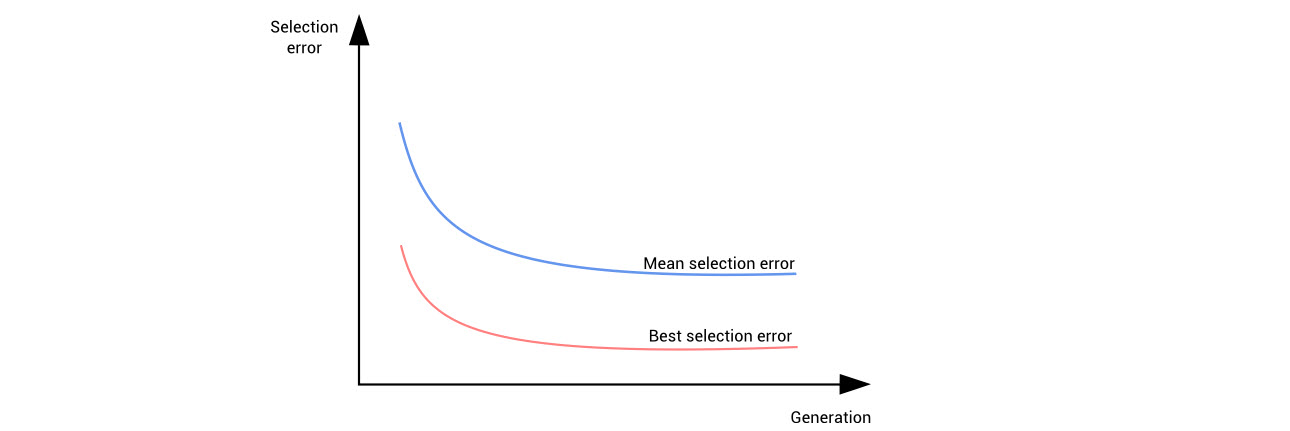

In [9]:
Image(filename='../image/fe/ev.jpg', width=1000, height=600)

In [24]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    
    # initial population of random bitstring(최초 조상 세대 임의 설정)
    pop = [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    
    # enumerate generations
    for gen in range(n_iter):
        
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(f'{gen}번째 세대에 등장한 {i}번 우열 개체의 유전자{pop[i]}와 목적함수 값은{scores[i]}')
                
        # select parents (n_pop 개체)
        selected = [selection(pop, scores) for _ in range(n_pop)] # n_pop회수의 코너먼트를 치룬 100개의 우수 유전자를 가진 개체 선정

        
        # create the next generation
        children = list() # 빈 리스트
        for i in range(0, n_pop, 2):
            
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                
                # mutation
                mutation(c, r_mut)
                
                # store for next generation
                children.append(c)
                
        # replace population
        pop = children
        
    return [best, best_eval, pop]  # 진화의 끝에서 적자생존한 개체의 유전자(best), 생존능력(score)과 전체 세대의 유전자 유형(pop) 

## genetic algorithm 수행

In [25]:
best, score, pop = genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut)
print('진화 완료!')
print(f'최종 적자생존한 개체의 최고 유전자는{best}, 목적함수는 {score}')

0번째 세대에 등장한 1번 우열 개체의 유전자[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]와 목적함수 값은-11
0번째 세대에 등장한 8번 우열 개체의 유전자[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]와 목적함수 값은-12
0번째 세대에 등장한 21번 우열 개체의 유전자[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]와 목적함수 값은-13
0번째 세대에 등장한 33번 우열 개체의 유전자[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]와 목적함수 값은-15
1번째 세대에 등장한 22번 우열 개체의 유전자[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]와 목적함수 값은-17
3번째 세대에 등장한 38번 우열 개체의 유전자[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]와 목적함수 값은-18
4번째 세대에 등장한 4번 우열 개체의 유전자[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]와 목적함수 값은-19
6번째 세대에 등장한 47번 우열 개체의 유전자[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]와 목적함수 값은-20
진화 완료!
최종 적자생존한 개체의 최고 유전자는[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 목적함수는 -20


In [26]:
print(f'최종 세대의 유전자 배열')
pd.DataFrame(pop)

최종 세대의 유전자 배열


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1
2,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
98,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


(array([ 4.,  0.,  7.,  0.,  0., 20.,  0., 39.,  0., 30.]),
 array([16. , 16.4, 16.8, 17.2, 17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '100th generations superiority')

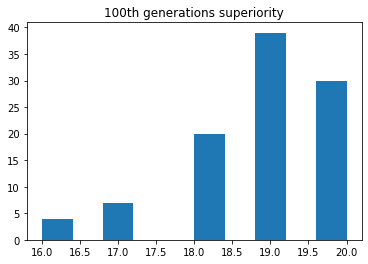

In [27]:
plt.hist(np.sum(pop, 1))
plt.title('100th generations superiority')

### (응용분야, Feature selection) An advanced algorithms for feature selection is the genetic algorithm.
         * Mathematically, inputs selection is formulated as a combinatorial optimization problem.

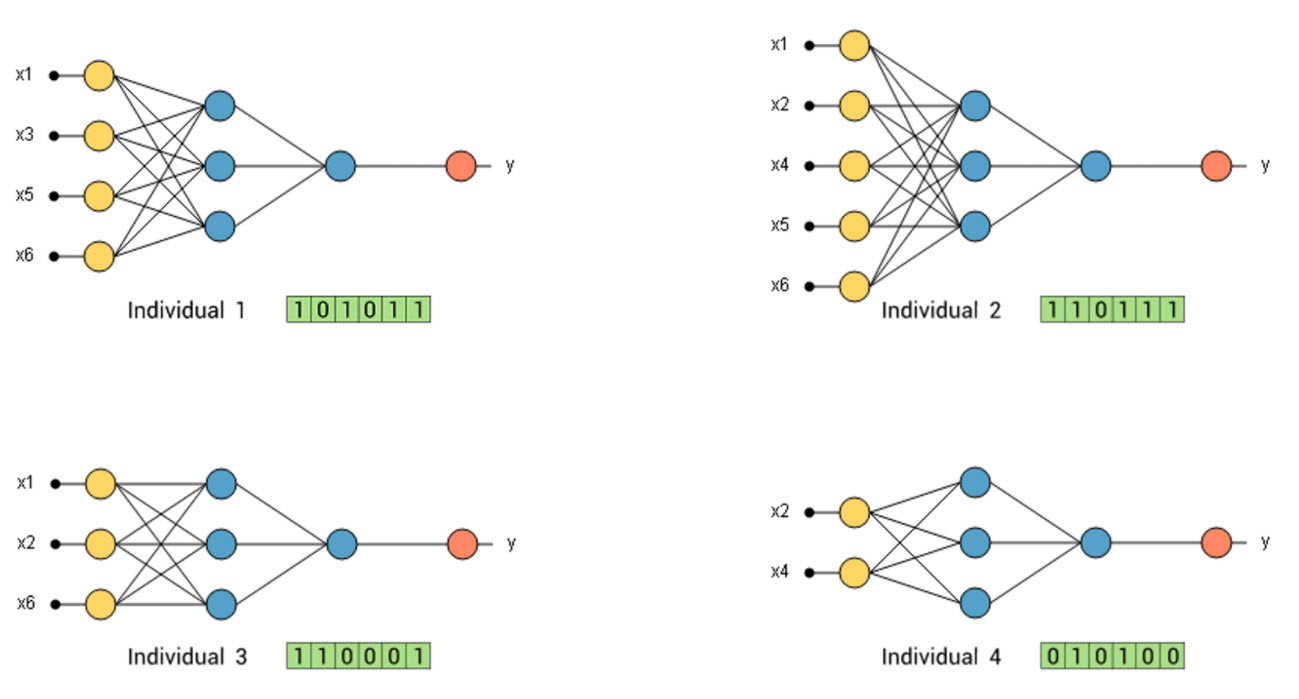

In [3]:
Image(filename='../image/fe/gn_fs.jpg', width=1000, height=600)

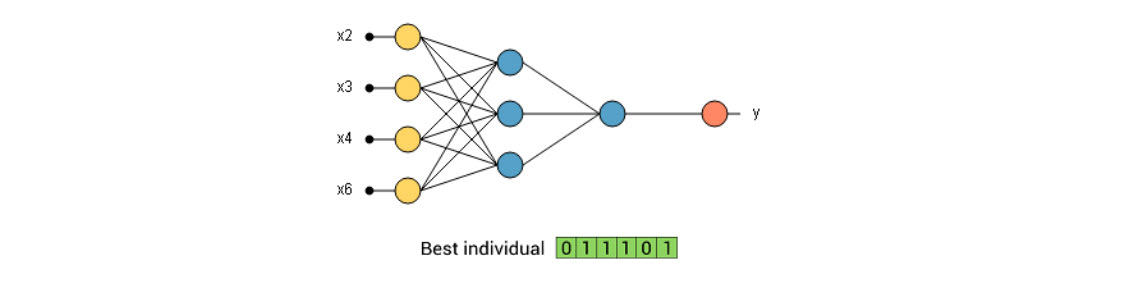

In [11]:
Image(filename='../image/fe/gn_best.jpg', width=1000, height=600)

# End